In [2]:
from pyforest import*
lazy_imports()

['import os',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import altair as alt',
 'import statsmodels.api as sm',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import glob',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.model_selection import StratifiedKFold',
 'import statistics',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn import svm',
 'from xlrd import open_workbook',
 'import gensim',
 'from sklearn.preprocessing import RobustScaler',
 'import datetime as dt',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.linear_model import ElasticNet',
 'import matplotlib as mpl',
 'from sklearn import metrics',
 'import bokeh',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'im

In [3]:
#importing csv file

train=pd.read_csv("amazontrain.csv")
test=pd.read_csv("amazontest.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [5]:

test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [6]:
train.shape

(32769, 10)

In [7]:
test.shape

(58921, 10)

<br>
<br>

# **CatBoost**



CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.


Procedure for other gradient boosting algorithms (XG boost, Light GBM)
Step 1: Consider all (or a sample ) the data points to train a highly biased model.

Step 2: Calculate residuals (errors) for each data point.

Step 3: Train another model with the same data points and corresponding residuals (errors) as class labels.

Step 4: Repeat Step 2 & Step 3 ( for n iterations).

This procedure is prone to overfitting, because we are calculating residuals of each data point by using the model that has already been trained on same set of data points.

<br>

**Advantages of CatBoost Library**

**Performance:** 

CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.

**Handling Categorical features automatically:**

We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. You can read more about it here.

**Robust:**

It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others. You can read about all these parameters here.

**Easy-to-use:** You can use CatBoost from the command line, using an user-friendly API for both Python and R.


*Reference for Gradient Boosting* : https://bit.ly/2LOJQYD

In [8]:
pip install catboost

In [9]:
# Loading data directly from CatBoost
from catboost.datasets import amazon

traindf, testdf = amazon()

In [10]:
traindf.shape 

(32769, 10)

In [11]:
testdf.shape

(58921, 10)

In [12]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


<br>

**ACTION** is our target column

<br>

In [13]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [14]:
traindf.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [15]:
traindf['MGR_ID'].value_counts()

MGR_ID
770      152
2270      99
2594      82
1350      71
2014      67
        ... 
97000      1
81506      1
12517      1
50296      1
22355      1
Name: count, Length: 4243, dtype: int64



## Distribution of Features

**Distplot**

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\1450609820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[i].dropna())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<IPython.core.display.Javascript object>

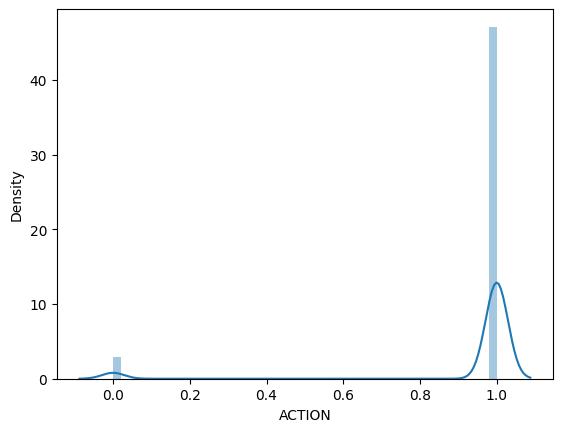

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\1450609820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[i].dropna())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<IPython.core.display.Javascript object>

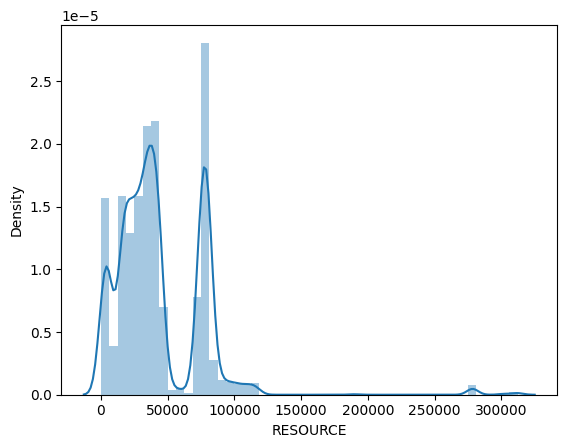

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\1450609820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[i].dropna())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<IPython.core.display.Javascript object>

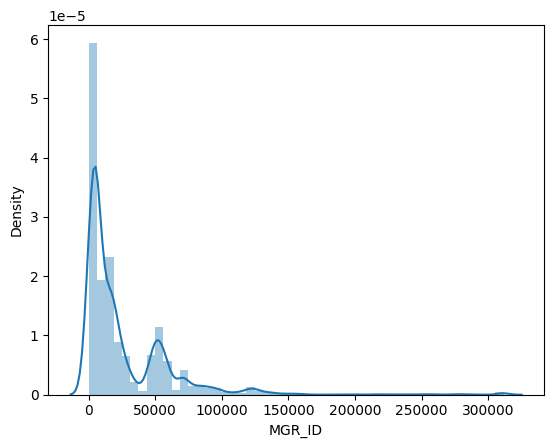

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\1450609820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[i].dropna())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<IPython.core.display.Javascript object>

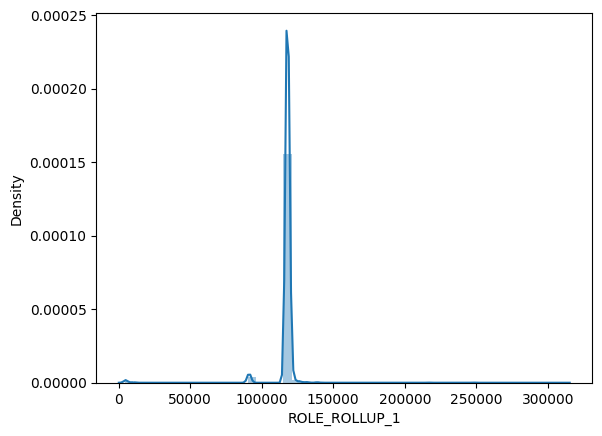

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\1450609820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[i].dropna())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<IPython.core.display.Javascript object>

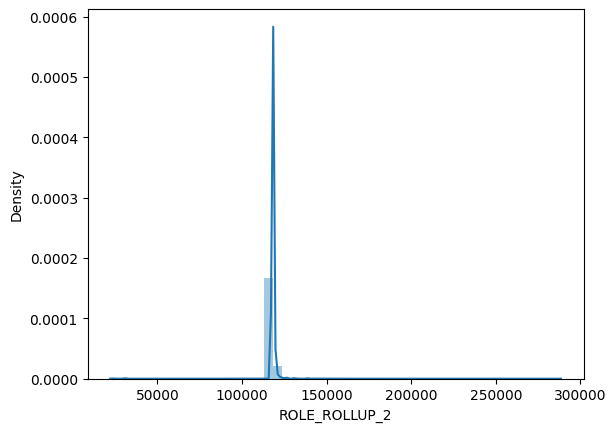

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\1450609820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[i].dropna())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<IPython.core.display.Javascript object>

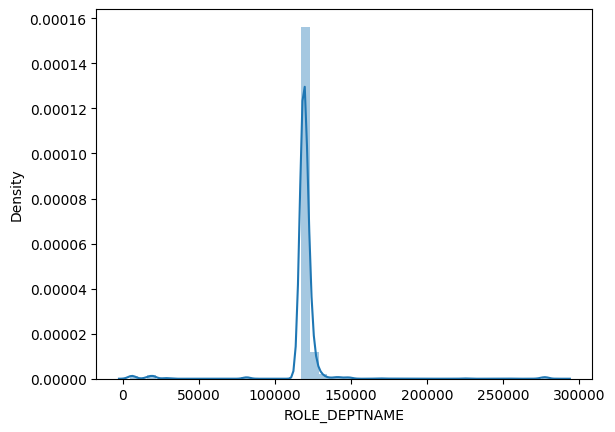

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\1450609820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[i].dropna())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<IPython.core.display.Javascript object>

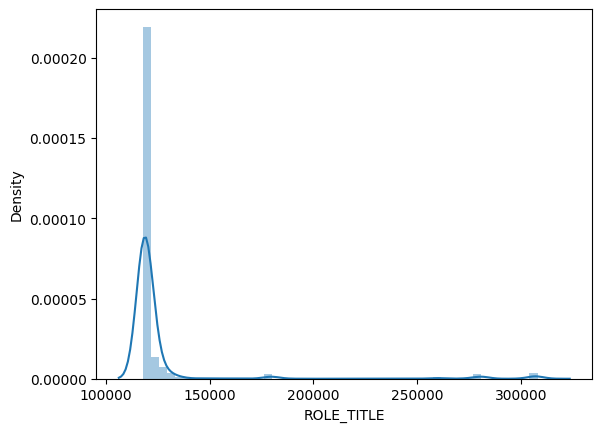

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\1450609820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[i].dropna())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<IPython.core.display.Javascript object>

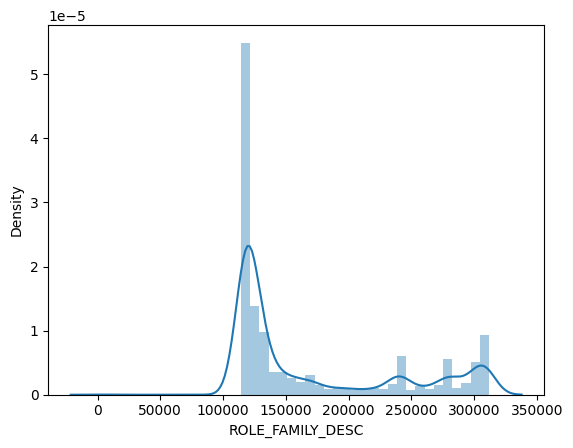

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\1450609820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[i].dropna())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<IPython.core.display.Javascript object>

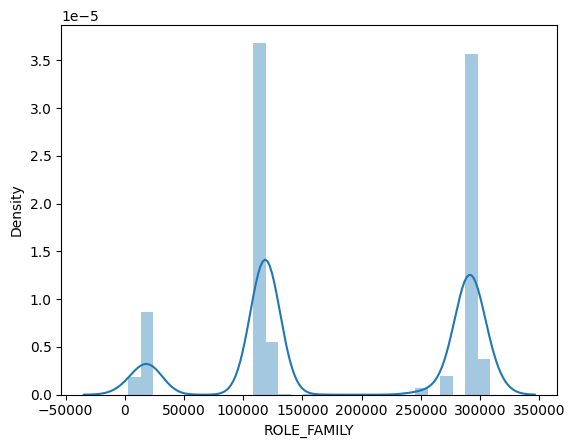

<IPython.core.display.Javascript object>

C:\Users\Asus\AppData\Local\Temp\ipykernel_16460\1450609820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf[i].dropna())
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<IPython.core.display.Javascript object>

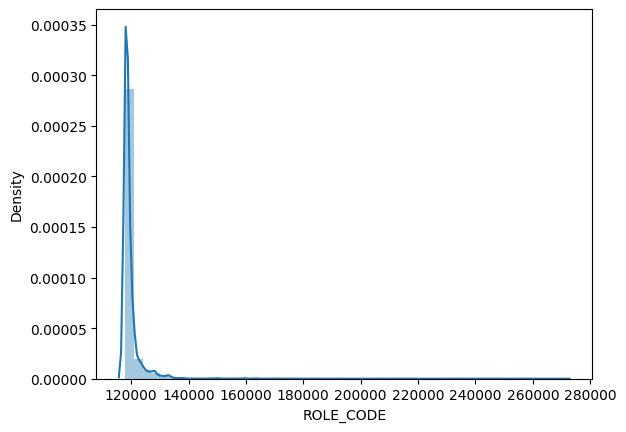

In [16]:
for i in traindf.describe().columns:
    sns.distplot(traindf[i].dropna())
    plt.show()

Boxplot


In [17]:
traindf['ACTION'].value_counts()

ACTION
1    30872
0     1897
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

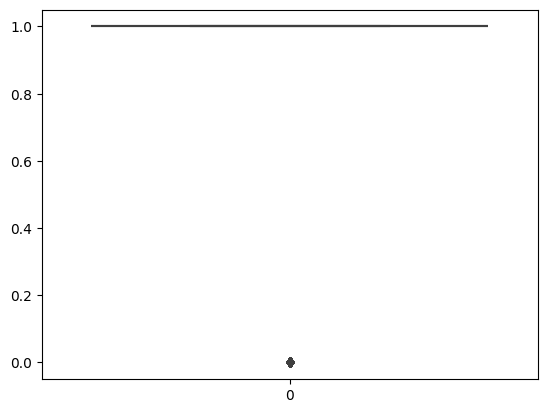

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

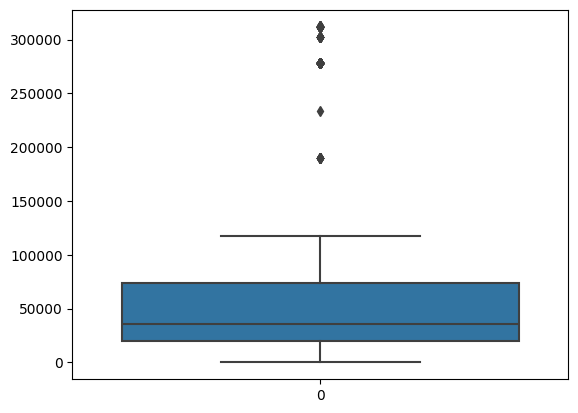

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

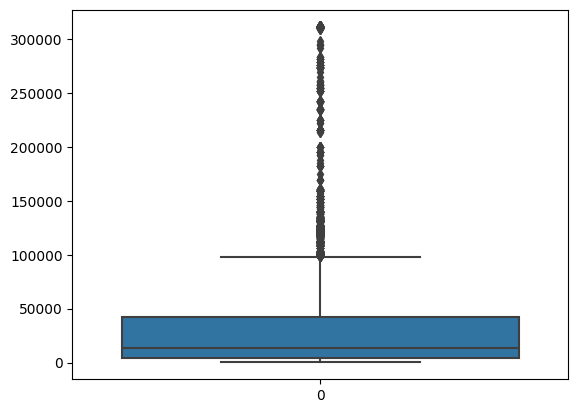

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

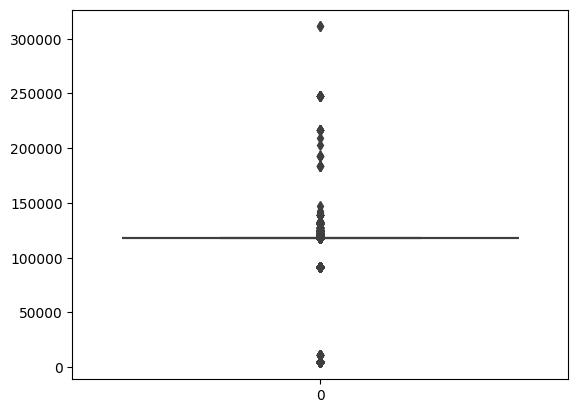

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

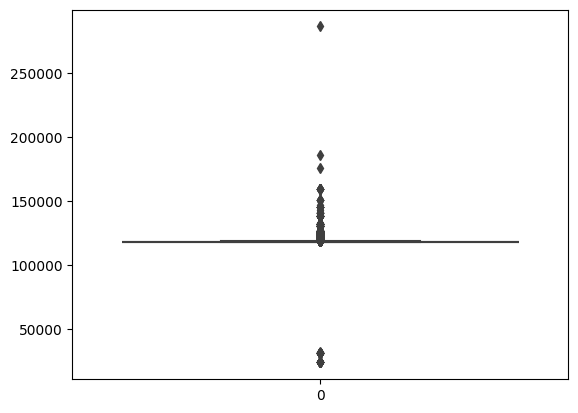

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

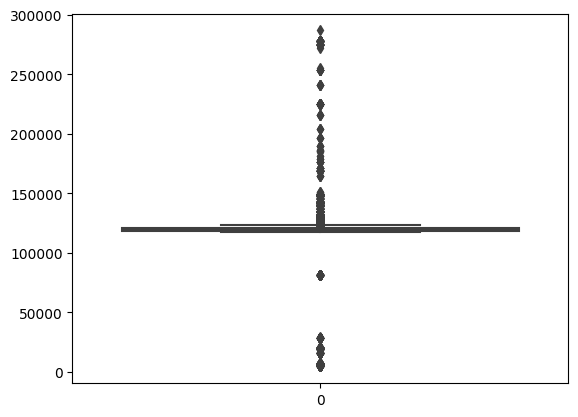

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

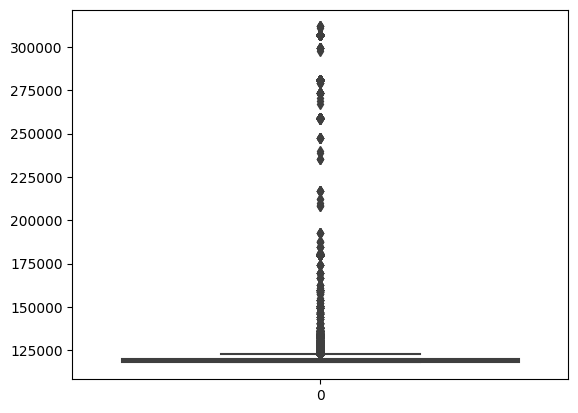

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

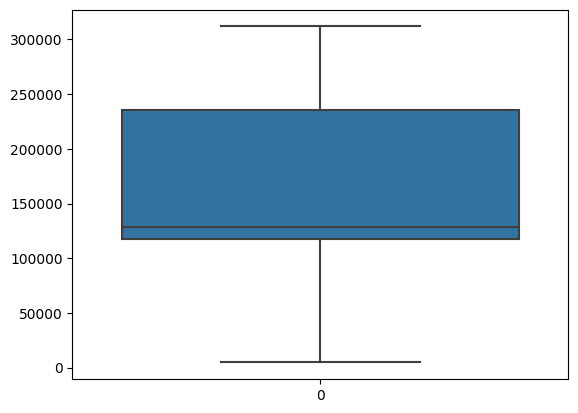

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

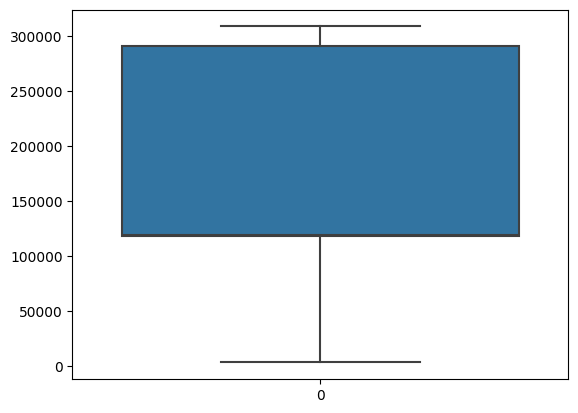

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

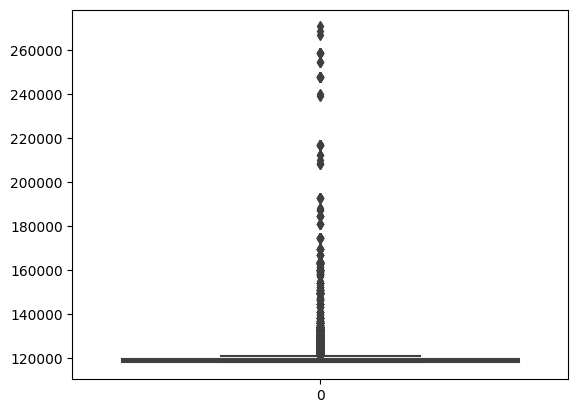

In [18]:
for i in traindf.describe().columns:
    sns.boxplot(traindf[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

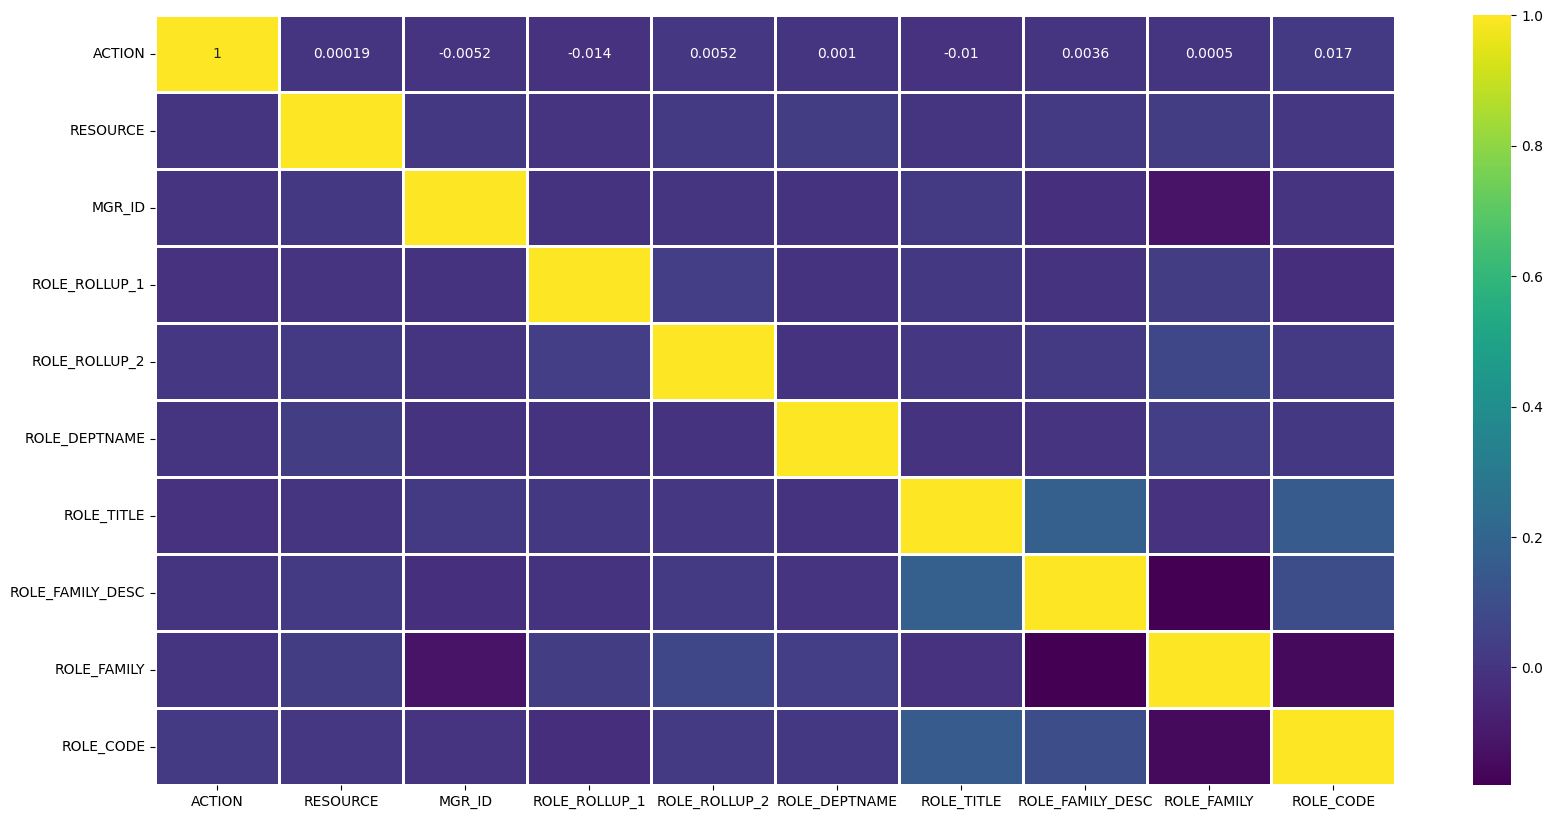

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(traindf.corr(),annot=True,cmap='viridis',linewidth=1)

In [20]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [21]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425





# Model Building

In [22]:
y = traindf['ACTION']

X = traindf.drop('ACTION',axis=1) 

X_test = testdf.drop('id',axis=1)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
from catboost import CatBoostClassifier

In [25]:
%%time

params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 1
         }
catmodel_1 = CatBoostClassifier(**params)
catmodel_1.fit(X_train, y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_valid, y_valid), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
         );

Learning rate set to 0.069882
0:	test: 0.5400959	best: 0.5400959 (0)	total: 223ms	remaining: 3m 42s
200:	test: 0.8020842	best: 0.8020842 (200)	total: 2.33s	remaining: 9.26s
400:	test: 0.8237941	best: 0.8237941 (400)	total: 4.05s	remaining: 6.05s
600:	test: 0.8328464	best: 0.8330283 (598)	total: 5.72s	remaining: 3.79s
800:	test: 0.8366271	best: 0.8370599 (785)	total: 7.57s	remaining: 1.88s
999:	test: 0.8417823	best: 0.8417823 (999)	total: 9.31s	remaining: 0us

bestTest = 0.8417823185
bestIteration = 999

CPU times: total: 14.9 s
Wall time: 9.67 s


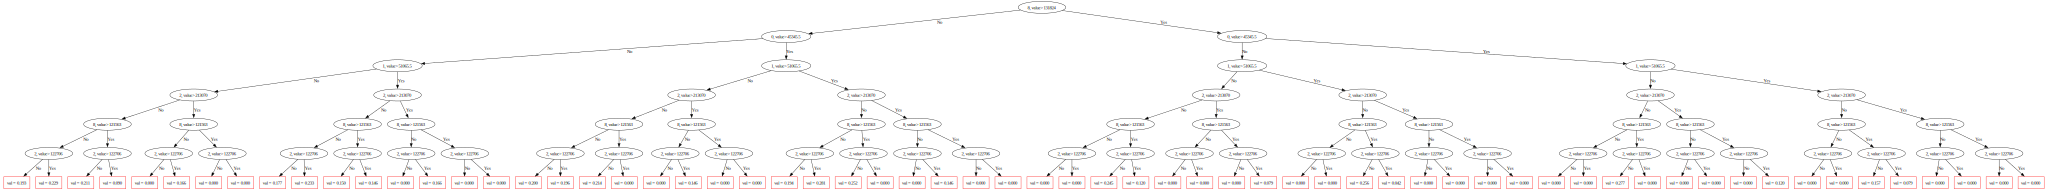

In [26]:
catmodel_1.plot_tree(tree_idx=0)

# https://catboost.ai/docs/concepts/python-reference_catboostclassifier_plot_tree.html

In [27]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [28]:
#In the above model CatBoost treated categorical features as numerical ones. Thus, the categories were ranked. We need to specify which features are categorical

categorical_features= list(range(X.shape[1]))
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [29]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'verbose': 200,
          'random_seed': 1
         }
catmodel = CatBoostClassifier(**params)
catmodel.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          use_best_model=True);
        

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 68.3ms	remaining: 1m 8s
200:	test: 0.8963628	best: 0.8963782 (199)	total: 11.4s	remaining: 45.5s
400:	test: 0.8989021	best: 0.8989325 (392)	total: 23.9s	remaining: 35.7s
600:	test: 0.8993557	best: 0.8998863 (511)	total: 39.5s	remaining: 26.2s
800:	test: 0.9009732	best: 0.9009732 (800)	total: 56.4s	remaining: 14s
999:	test: 0.9002624	best: 0.9012478 (820)	total: 1m 9s	remaining: 0us

bestTest = 0.9012478381
bestIteration = 820

Shrink model to first 821 iterations.
CPU times: total: 1min 29s
Wall time: 1min 9s


<br>

### Cross Validation

In [30]:
from catboost import cv
from catboost import Pool, cv



params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed':1
         }

# pool for Dataset processing.

total_train_data = Pool(data=X,
                      label=y,
                      cat_features= categorical_features
                     )

scores = cv(pool=total_train_data,
            params=params, 
            fold_count=4,
            seed=1, 
            shuffle=True,
            stratified=True, # if True the folds are made by preserving the percentage of samples for each class
           )


Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 16.7ms	remaining: 16.7s
200:	test: 0.8938231	best: 0.8938231 (200)	total: 11.3s	remaining: 44.8s
400:	test: 0.8976768	best: 0.8976768 (400)	total: 23.6s	remaining: 35.2s
600:	test: 0.9012104	best: 0.9012104 (600)	total: 36.7s	remaining: 24.4s
800:	test: 0.9026744	best: 0.9029761 (755)	total: 51.8s	remaining: 12.9s
999:	test: 0.9035036	best: 0.9035617 (989)	total: 1m 6s	remaining: 0us

bestTest = 0.9035617354
bestIteration = 989

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 18.6ms	remaining: 18.6s
200:	test: 0.8826904	best: 0.8827199 (199)	total: 11.9s	remaining: 47.3s
400:	test: 0.8844538	best: 0.8844538 (400)	total: 25s	remaining: 37.3s
600:	test: 0.8851686	best: 0.8854438 (571)	total: 38.5s	remaining: 25.5s
800:	test: 0.8840131	best: 0.8854438 (571)	total: 51.6s	remaining: 12.8s
999:	test: 0.8834802	best: 0.8854438 (571)	total: 1m 4s	remaining: 0us

bestTest = 0.8854438307
bestIteration = 571

In [31]:
feature_imp=catmodel.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,RESOURCE,19.011684
1,ROLE_DEPTNAME,16.973756
2,MGR_ID,13.928303
3,ROLE_ROLLUP_2,13.316408
4,ROLE_TITLE,9.475144
5,ROLE_FAMILY_DESC,8.930017
6,ROLE_ROLLUP_1,8.178098
7,ROLE_FAMILY,7.388187
8,ROLE_CODE,2.798402


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


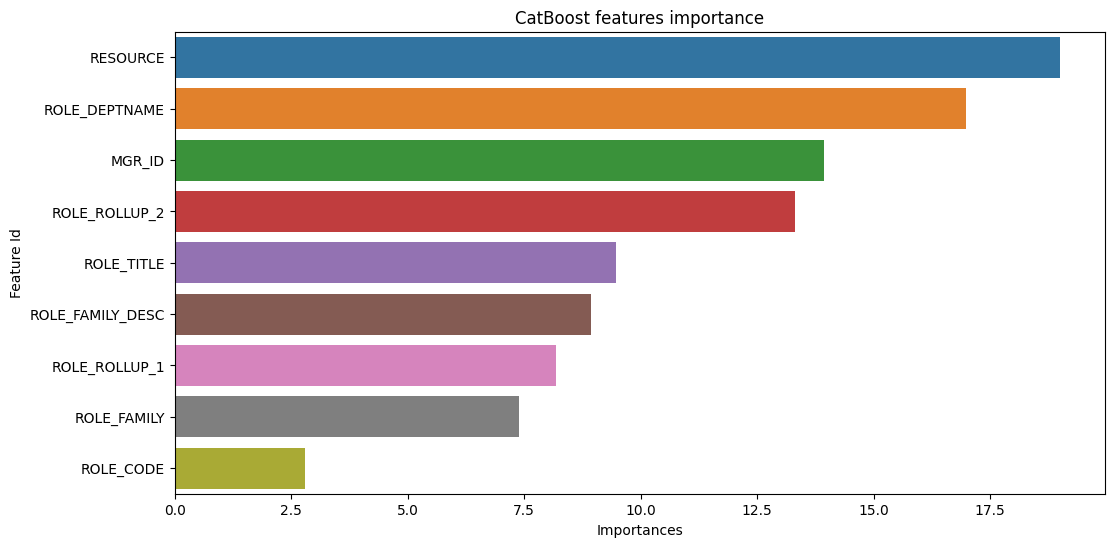

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x="Importances", y="Feature Id", data=feature_imp, orient='h')
plt.title('CatBoost features importance')
plt.show()


In [33]:
predictions=catmodel.predict_proba(X_test)

In [34]:
predictions=catmodel.predict(X_test)


In [35]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
catmodel.score(X_valid, y_valid)

0.9566703283290614

In [37]:
traindf['ACTION'].value_counts()

ACTION
1    30872
0     1897
Name: count, dtype: int64

Removing unnecessary Features 

In [40]:
df_train= traindf[['ROLE_TITLE','ROLE_FAMILY_DESC','ROLE_ROLLUP_1','ROLE_CODE']]

In [42]:
df_train.head(10)

,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_ROLLUP_1,ROLE_CODE
0,117905,117906,117961,117908
1,118536,118536,117961,118539
2,117879,267952,118219,117880
3,118321,240983,117961,118322
4,119323,123932,117929,119325
5,118568,118568,117951,118570
6,118980,301534,117961,118982
7,126820,269034,117961,126822
8,128230,302830,117961,128231
9,117879,304519,118079,117880


In [ ]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': ,
          'verbose': 200,
          'random_seed': 1
         }
catmodel = CatBoostClassifier(**params)
catmodel.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          use_best_model=True);
